In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_48.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range', 'Y_mean', 'X_mean', 'X_max','Z_mean', 'X_jerk_max', 'X_jerk_range', 'X_range'], axis=1)

In [4]:
data.columns

Index(['label', 'X_rms', 'X_std', 'Y_min', 'Y_max', 'Y_range', 'Y_rms',
       'Y_std', 'Z_min', 'Z_max', 'Z_range', 'Z_rms', 'Z_std', 'X_jerk_rms',
       'X_jerk_std', 'Y_jerk_min', 'Y_jerk_max', 'Y_jerk_range', 'Y_jerk_rms',
       'Y_jerk_std', 'Z_jerk_min', 'Z_jerk_max', 'Z_jerk_range', 'Z_jerk_rms',
       'Z_jerk_std', 'total_jerk_min', 'total_jerk_max', 'total_jerk_range',
       'total_jerk_rms', 'total_jerk_std', 'SMA', 'X_entropy', 'Y_entropy',
       'Z_entropy'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [6]:
x=data.drop(['label'], axis=1)
y=data['label']

In [7]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [8]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 33), (1121, 33))

In [9]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 33), (169, 33))

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2025-04-12 22:41:29.337367: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-12 22:41:29.337851: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-12 22:41:29.340011: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-12 22:41:29.346135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744476089.356840  513684 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744476089.36

In [11]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
model = Sequential([
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

2025-04-12 22:41:30.552328: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [14]:
model.compile(optimizer=SGD(learning_rate=lr_schedule, 
                            momentum=0.97, 
                            nesterov=True),  # Enable Nesterov momentum
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# model.compile(optimizer=Adam(), 
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train,
                                epochs=800,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/800
41/41 - 1s - 36ms/step - accuracy: 0.2621 - loss: 1.9388 - val_accuracy: 0.3309 - val_loss: 1.7908
Epoch 2/800
41/41 - 0s - 2ms/step - accuracy: 0.4277 - loss: 1.5293 - val_accuracy: 0.4023 - val_loss: 1.5716
Epoch 3/800
41/41 - 0s - 2ms/step - accuracy: 0.4552 - loss: 1.4186 - val_accuracy: 0.4538 - val_loss: 1.4112
Epoch 4/800
41/41 - 0s - 3ms/step - accuracy: 0.4927 - loss: 1.3538 - val_accuracy: 0.4895 - val_loss: 1.3252
Epoch 5/800
41/41 - 0s - 2ms/step - accuracy: 0.5088 - loss: 1.2830 - val_accuracy: 0.5189 - val_loss: 1.2438
Epoch 6/800
41/41 - 0s - 2ms/step - accuracy: 0.5310 - loss: 1.2189 - val_accuracy: 0.5305 - val_loss: 1.1817
Epoch 7/800
41/41 - 0s - 2ms/step - accuracy: 0.5321 - loss: 1.2150 - val_accuracy: 0.5651 - val_loss: 1.1263
Epoch 8/800
41/41 - 0s - 2ms/step - accuracy: 0.5363 - loss: 1.2232 - val_accuracy: 0.5746 - val_loss: 1.1132
Epoch 9/800
41/41 - 0s - 2ms/step - accuracy: 0.5566 - loss: 1.1439 - val_accuracy: 0.5819 - val_loss: 1.0757
Epoch 10/

Epoch 68/500
41/41 - 0s - loss: 0.7379 - accuracy: 0.7249 - val_loss: 0.7871 - val_accuracy: 0.7059 - 70ms/epoch - 2ms/step
Epoch 69/500
41/41 - 0s - loss: 0.7125 - accuracy: 0.7410 - val_loss: 0.7444 - val_accuracy: 0.7332 - 63ms/epoch - 2ms/step
Epoch 70/500
41/41 - 0s - loss: 0.7129 - accuracy: 0.7376 - val_loss: 0.7611 - val_accuracy: 0.7353 - 65ms/epoch - 2ms/step
Epoch 71/500
41/41 - 0s - loss: 0.7507 - accuracy: 0.7230 - val_loss: 0.7935 - val_accuracy: 0.7048 - 65ms/epoch - 2ms/step
Epoch 72/500
41/41 - 0s - loss: 0.7476 - accuracy: 0.7215 - val_loss: 0.7410 - val_accuracy: 0.7363 - 58ms/epoch - 1ms/step
Epoch 73/500
41/41 - 0s - loss: 0.7319 - accuracy: 0.7334 - val_loss: 0.7582 - val_accuracy: 0.7216 - 61ms/epoch - 1ms/step
Epoch 74/500
41/41 - 0s - loss: 0.6955 - accuracy: 0.7471 - val_loss: 0.7547 - val_accuracy: 0.7437 - 59ms/epoch - 1ms/step
Epoch 75/500
41/41 - 0s - loss: 0.7246 - accuracy: 0.7345 - val_loss: 0.7219 - val_accuracy: 0.7363 - 64ms/epoch - 2ms/step
Epoch 76

Epoch 134/500
41/41 - 0s - loss: 0.5559 - accuracy: 0.7992 - val_loss: 0.6959 - val_accuracy: 0.7742 - 56ms/epoch - 1ms/step
Epoch 135/500
41/41 - 0s - loss: 0.5366 - accuracy: 0.8049 - val_loss: 0.7024 - val_accuracy: 0.7679 - 56ms/epoch - 1ms/step
Epoch 136/500
41/41 - 0s - loss: 0.5477 - accuracy: 0.8037 - val_loss: 0.6772 - val_accuracy: 0.7805 - 57ms/epoch - 1ms/step
Epoch 137/500
41/41 - 0s - loss: 0.5496 - accuracy: 0.8041 - val_loss: 0.6832 - val_accuracy: 0.7773 - 57ms/epoch - 1ms/step
Epoch 138/500
41/41 - 0s - loss: 0.5621 - accuracy: 0.8003 - val_loss: 0.6610 - val_accuracy: 0.7805 - 58ms/epoch - 1ms/step
Epoch 139/500
41/41 - 0s - loss: 0.5811 - accuracy: 0.7946 - val_loss: 0.6654 - val_accuracy: 0.7815 - 57ms/epoch - 1ms/step
Epoch 140/500
41/41 - 0s - loss: 0.5613 - accuracy: 0.7930 - val_loss: 0.6983 - val_accuracy: 0.7563 - 57ms/epoch - 1ms/step
Epoch 141/500
41/41 - 0s - loss: 0.5686 - accuracy: 0.7984 - val_loss: 0.6903 - val_accuracy: 0.7710 - 56ms/epoch - 1ms/step


Epoch 200/500
41/41 - 0s - loss: 0.4503 - accuracy: 0.8363 - val_loss: 0.7092 - val_accuracy: 0.7826 - 57ms/epoch - 1ms/step
Epoch 201/500
41/41 - 0s - loss: 0.5005 - accuracy: 0.8252 - val_loss: 0.6677 - val_accuracy: 0.7889 - 57ms/epoch - 1ms/step
Epoch 202/500
41/41 - 0s - loss: 0.4648 - accuracy: 0.8366 - val_loss: 0.6570 - val_accuracy: 0.7899 - 68ms/epoch - 2ms/step
Epoch 203/500
41/41 - 0s - loss: 0.4529 - accuracy: 0.8370 - val_loss: 0.6539 - val_accuracy: 0.8088 - 56ms/epoch - 1ms/step
Epoch 204/500
41/41 - 0s - loss: 0.4552 - accuracy: 0.8328 - val_loss: 0.6561 - val_accuracy: 0.7878 - 55ms/epoch - 1ms/step
Epoch 205/500
41/41 - 0s - loss: 0.4130 - accuracy: 0.8508 - val_loss: 0.6892 - val_accuracy: 0.7931 - 58ms/epoch - 1ms/step
Epoch 206/500
41/41 - 0s - loss: 0.4969 - accuracy: 0.8263 - val_loss: 0.6653 - val_accuracy: 0.7878 - 57ms/epoch - 1ms/step
Epoch 207/500
41/41 - 0s - loss: 0.4685 - accuracy: 0.8428 - val_loss: 0.6858 - val_accuracy: 0.7941 - 58ms/epoch - 1ms/step


Epoch 266/500
41/41 - 0s - loss: 0.4007 - accuracy: 0.8581 - val_loss: 0.6897 - val_accuracy: 0.7983 - 68ms/epoch - 2ms/step
Epoch 267/500
41/41 - 0s - loss: 0.4152 - accuracy: 0.8535 - val_loss: 0.6841 - val_accuracy: 0.7920 - 64ms/epoch - 2ms/step
Epoch 268/500
41/41 - 0s - loss: 0.3893 - accuracy: 0.8630 - val_loss: 0.7066 - val_accuracy: 0.8004 - 63ms/epoch - 2ms/step
Epoch 269/500
41/41 - 0s - loss: 0.3977 - accuracy: 0.8585 - val_loss: 0.6629 - val_accuracy: 0.7941 - 66ms/epoch - 2ms/step
Epoch 270/500
41/41 - 0s - loss: 0.3980 - accuracy: 0.8646 - val_loss: 0.6844 - val_accuracy: 0.7815 - 62ms/epoch - 2ms/step
Epoch 271/500
41/41 - 0s - loss: 0.4004 - accuracy: 0.8546 - val_loss: 0.6953 - val_accuracy: 0.7994 - 59ms/epoch - 1ms/step
Epoch 272/500
41/41 - 0s - loss: 0.4012 - accuracy: 0.8585 - val_loss: 0.6809 - val_accuracy: 0.7931 - 61ms/epoch - 1ms/step
Epoch 273/500
41/41 - 0s - loss: 0.3933 - accuracy: 0.8539 - val_loss: 0.6752 - val_accuracy: 0.7941 - 59ms/epoch - 1ms/step


Epoch 332/500
41/41 - 0s - loss: 0.3506 - accuracy: 0.8772 - val_loss: 0.7088 - val_accuracy: 0.8036 - 57ms/epoch - 1ms/step
Epoch 333/500
41/41 - 0s - loss: 0.3529 - accuracy: 0.8749 - val_loss: 0.7015 - val_accuracy: 0.8025 - 57ms/epoch - 1ms/step
Epoch 334/500
41/41 - 0s - loss: 0.3323 - accuracy: 0.8841 - val_loss: 0.7108 - val_accuracy: 0.7931 - 57ms/epoch - 1ms/step
Epoch 335/500
41/41 - 0s - loss: 0.3182 - accuracy: 0.8852 - val_loss: 0.7183 - val_accuracy: 0.8099 - 57ms/epoch - 1ms/step
Epoch 336/500
41/41 - 0s - loss: 0.3509 - accuracy: 0.8791 - val_loss: 0.6959 - val_accuracy: 0.8057 - 57ms/epoch - 1ms/step
Epoch 337/500
41/41 - 0s - loss: 0.3353 - accuracy: 0.8722 - val_loss: 0.6812 - val_accuracy: 0.8141 - 57ms/epoch - 1ms/step
Epoch 338/500
41/41 - 0s - loss: 0.3473 - accuracy: 0.8764 - val_loss: 0.6972 - val_accuracy: 0.8004 - 57ms/epoch - 1ms/step
Epoch 339/500
41/41 - 0s - loss: 0.3467 - accuracy: 0.8718 - val_loss: 0.6941 - val_accuracy: 0.7994 - 57ms/epoch - 1ms/step


Epoch 398/500
41/41 - 0s - loss: 0.3243 - accuracy: 0.8864 - val_loss: 0.7209 - val_accuracy: 0.8046 - 56ms/epoch - 1ms/step
Epoch 399/500
41/41 - 0s - loss: 0.3299 - accuracy: 0.8791 - val_loss: 0.6897 - val_accuracy: 0.8025 - 57ms/epoch - 1ms/step
Epoch 400/500
41/41 - 0s - loss: 0.3111 - accuracy: 0.8925 - val_loss: 0.7006 - val_accuracy: 0.7983 - 56ms/epoch - 1ms/step
Epoch 401/500
41/41 - 0s - loss: 0.3197 - accuracy: 0.8936 - val_loss: 0.6798 - val_accuracy: 0.8099 - 56ms/epoch - 1ms/step
Epoch 402/500
41/41 - 0s - loss: 0.3009 - accuracy: 0.8898 - val_loss: 0.6957 - val_accuracy: 0.8183 - 57ms/epoch - 1ms/step
Epoch 403/500
41/41 - 0s - loss: 0.2944 - accuracy: 0.8998 - val_loss: 0.7171 - val_accuracy: 0.8036 - 56ms/epoch - 1ms/step
Epoch 404/500
41/41 - 0s - loss: 0.2982 - accuracy: 0.8883 - val_loss: 0.7082 - val_accuracy: 0.8078 - 56ms/epoch - 1ms/step
Epoch 405/500
41/41 - 0s - loss: 0.2975 - accuracy: 0.8929 - val_loss: 0.7031 - val_accuracy: 0.8130 - 56ms/epoch - 1ms/step


Epoch 464/500
41/41 - 0s - loss: 0.2925 - accuracy: 0.8967 - val_loss: 0.7096 - val_accuracy: 0.8078 - 57ms/epoch - 1ms/step
Epoch 465/500
41/41 - 0s - loss: 0.2622 - accuracy: 0.9074 - val_loss: 0.7032 - val_accuracy: 0.8162 - 56ms/epoch - 1ms/step
Epoch 466/500
41/41 - 0s - loss: 0.2729 - accuracy: 0.9013 - val_loss: 0.7130 - val_accuracy: 0.8214 - 57ms/epoch - 1ms/step
Epoch 467/500
41/41 - 0s - loss: 0.2718 - accuracy: 0.9078 - val_loss: 0.7264 - val_accuracy: 0.8078 - 56ms/epoch - 1ms/step
Epoch 468/500
41/41 - 0s - loss: 0.2753 - accuracy: 0.8990 - val_loss: 0.6955 - val_accuracy: 0.8099 - 63ms/epoch - 2ms/step
Epoch 469/500
41/41 - 0s - loss: 0.3057 - accuracy: 0.8929 - val_loss: 0.7056 - val_accuracy: 0.8088 - 57ms/epoch - 1ms/step
Epoch 470/500
41/41 - 0s - loss: 0.2846 - accuracy: 0.8936 - val_loss: 0.6992 - val_accuracy: 0.8193 - 57ms/epoch - 1ms/step
Epoch 471/500
41/41 - 0s - loss: 0.2759 - accuracy: 0.9055 - val_loss: 0.7008 - val_accuracy: 0.8057 - 57ms/epoch - 1ms/step


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,001 (226.57 KB)

 Trainable params: 28,632 (111.84 KB)

 Non-trainable params: 736 (2.88 KB)

 Optimizer params: 28,633 (111.85 KB)

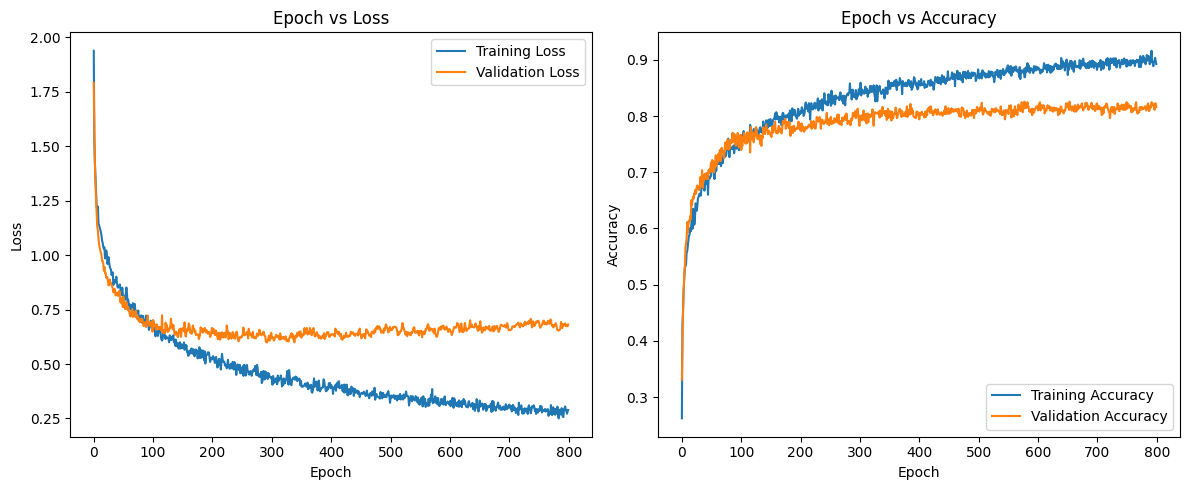

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.13%
Test Accuracy: 84.02%


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


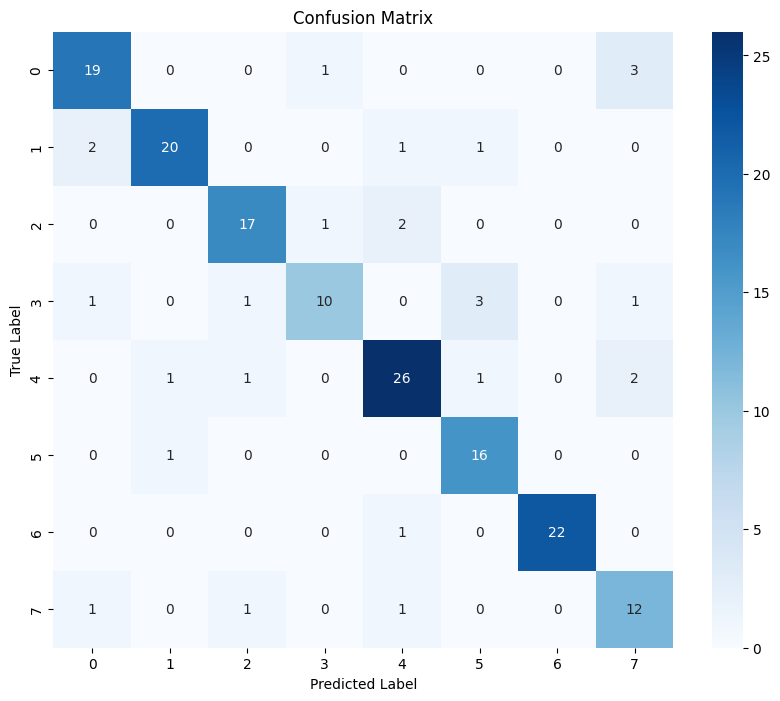

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.91      0.83      0.87        24
           2       0.85      0.85      0.85        20
           3       0.83      0.62      0.71        16
           4       0.84      0.84      0.84        31
           5       0.76      0.94      0.84        17
           6       1.00      0.96      0.98        23
           7       0.67      0.80      0.73        15

    accuracy                           0.84       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.85      0.84      0.84       169



In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)


In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [24]:
label_mapping = {
    'CW_Circle': 0,
    'CCW_Circle': 1,
    'CW_Square': 2,
    'CCW_Square': 3,
    'CW_Triangle': 4,
    'CCW_Triangle': 5,
    'Double_Tap': 6,
    'S': 7
}

Gini Coefficients:
CW_Circle: 0.95
CCW_Circle: 0.97
CW_Square: 0.95
CCW_Square: 0.94
CW_Triangle: 0.86
CCW_Triangle: 0.98
Double_Tap: 0.99
S: 0.91


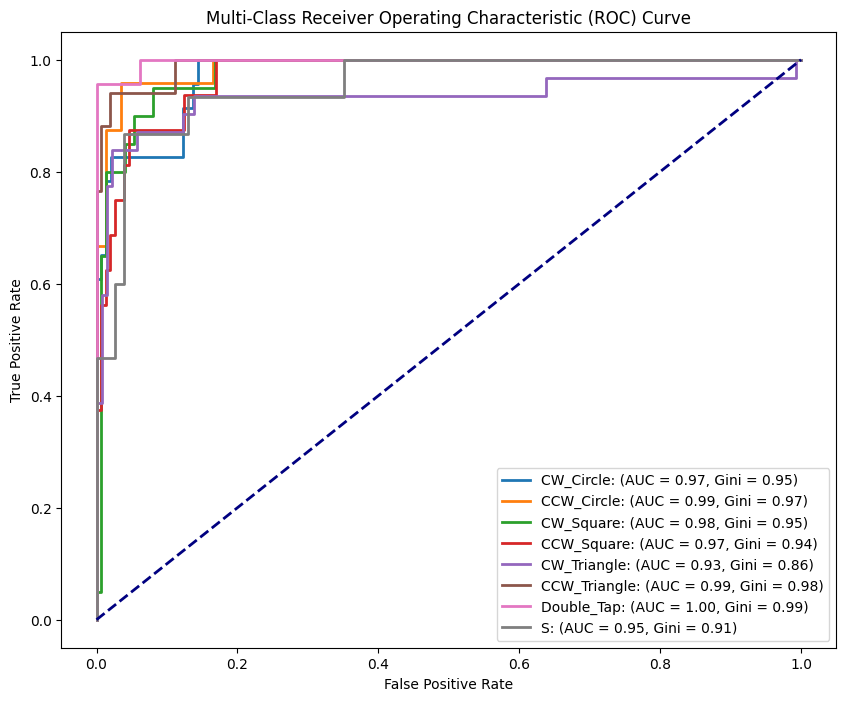

In [25]:
n_classes=8
y_test = np.array(y_test)  # Convert to numpy array if y_test is a pandas Series/DataFrame
y_pred = np.array(y_pred)  # Convert to numpy array if y_pred is a pandas Series/DataFrame

# If y_test is not one-hot encoded (1D array of class labels), convert it
if len(y_test.shape) == 1:
    y_test_one_hot = np.eye(n_classes)[y_test]  # One-hot encode y_test
else:
    y_test_one_hot = y_test  # Already one-hot encoded

# Compute ROC AUC for each class
roc_auc = []
for i in range(n_classes):
    auc = roc_auc_score(y_test_one_hot[:, i], y_pred[:, i])  # Use one-hot encoded y_test
    roc_auc.append(auc)

# Compute Gini Coefficient for each class
gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Print Gini Coefficients with class names
print("Gini Coefficients:")
for i, gini in gini_coefficients.items():
    class_name = [name for name, label in label_mapping.items() if label == i][0]
    print(f"{class_name}: {gini:.2f}")

# Optionally display Gini Coefficients on the ROC curve plot with class names
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    class_name = [name for name, label in label_mapping.items() if label == i][0]
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])  # Get ROC curve data for each class
    plt.plot(fpr, tpr, lw=2, label=f'{class_name}: (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

# Add a "chance" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
model.save('chi2_33_small.h5')

In [28]:
# Save only the weights
model.save_weights('model.weights.h5')